In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv')
test = pd.read_csv('/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv')

In [ ]:
train.head()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

# We will work our way collumn by collumn

**Let us First try to visualise the data to get a better grasp of it**

In [ ]:
print("Let us see the consistency of data in terms of enrollee id")
train.sort_values(by=['enrollee_id'])

It can be clearly seen that a lot of enrollee_ids'(e.g 3,6,... etc.) are missing. Hence it will be useless for our model.

In [ ]:
print("Number of different cities from which data is taken : " + str(len(np.unique(train.city))))

There are a total of 123 different cities that are a part of this data!

Let us find out which city harbours the maximum number of enrollees!

In [ ]:
data = train.city.value_counts().reset_index().rename(columns={
    'index':'city',
    'city' : 'occurences'
}).head(20)
fig = plt.figure(figsize=(10,10))
sns.barplot(x = 'occurences',y = 'city',data=data)
plt.title('Number of enrollees per city (Top 20 cities only) ')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

## Let us now see the probability distribution curve of the city development index 

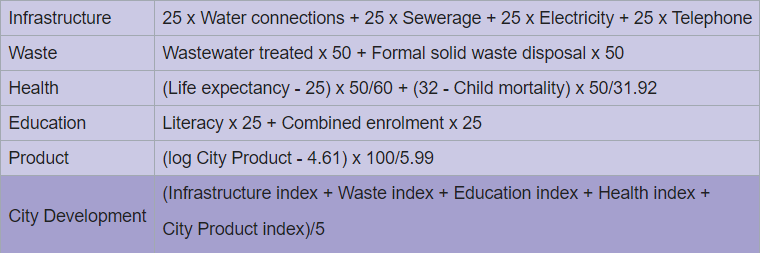

## More the C.D.I, better the living standards of that particular city

Probability Density Functions are a statistical measure used to gauge the likely outcome of a discrete value. The area under the curve of probability distribution graph represents how likely an event is to occur.

In [ ]:
fig = plt.figure(figsize=(8,7))
sns.distplot(train['city_development_index'],hist=False,color='r')
plt.xlabel('City Development Index')
plt.ylabel('Probability Density')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title("Probability Density Function for City Development index",fontsize=13)
plt.show()

### The maximum number of values are seen to lie between 0.9-1.0

## Moving on to the gender collumn

In [ ]:
print("Percentage of missing values in gender collumn : " + str(round(train.gender.isna().sum()/train.shape[0]*100,2)) +" %")

We can safely assume that the missing values in the gender collumns are employees who : 
1. Did not want to disclose their gender
2. Didn't fit in the conventional male/female gender collumn
3. Forgot to fill the gender collumn

Nevertheless, we will label all NaN values as "Others"

In [ ]:
train.gender = train.gender.fillna('Other')
print("Different categories of gender now : " + str(np.unique(train.gender)))

In [ ]:
labels1 = ['Male','Other','Female']
fig = plt.figure(figsize=(9,9))
color = ['c','orange','r']
textprop = {'fontsize' : 13}
plt.pie(train.gender.value_counts(),labels = labels1,autopct = '%1.2f%%',explode=[0,0.1,0.2],
       shadow=True,textprops = textprop,colors = color)
plt.title("Pie chart depicting percentage values of different employee's genders",fontsize=14)
plt.show()

### Experience


In [ ]:
print("Unique values in Experience collumn : " + str(np.unique(train.relevent_experience)))

In [ ]:
f,ax = plt.subplots(1,2,figsize=(10,10))
labels2 = ['Has relevant Experience','No relevant experience']
color1 = ['blue','orange']
textprop = {'fontsize' : 13}
ax[0].pie(train.relevent_experience.value_counts(),labels = labels2,autopct = '%1.2f%%',explode=[0,0.2],
       shadow=True,textprops = textprop,colors = color1)
ax[0].set_title("Pie chart depicting percentage values of Relevant experience",fontsize=13)


sns.countplot(train.relevent_experience,ax=ax[1])
plt.xticks(fontsize=8)
plt.tight_layout(pad=4)

We will not go over each collumn variable because this will take up lot of time,space and is not of any fruitful outcome.
We will only check the probability distribution of training hours and percentage distribution of our outcome variable and the major discipline.


In [ ]:
sns.distplot(train.training_hours,hist=False)
plt.title('Probability distribution curve for Training hours',fontsize=13)
plt.xlabel('Training Hours',fontsize=13)
plt.ylabel('Probability density',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,9))
colors_1 = ['palegreen','red','magenta','cyan','yellow','lightsteelblue']
labels_1 = ['STEM','Humanities','Other','Business Degree','Arts','No Major']
textprop = {'fontsize' : 13}
plt.pie(train.major_discipline.value_counts(),colors=colors_1,labels=labels_1,autopct = '%1.2f%%',explode=[0,0.1,0.2,0.2,0.3,0.3],
       shadow=True,textprops = textprop)
plt.title("Percentage values of Major Discipline",fontsize=13)
plt.show()

In [ ]:
fig = plt.figure(figsize=(9,9))
labels_2 = ["Doesn't want to change job","Wants to change job"]
colors = ['cyan','magenta']
textprop = {'fontsize' : 13}
plt.pie(train.target.value_counts(),labels=labels_2,autopct = '%1.2f%%',explode=[0,0.2],
       shadow=True,textprops = textprop,colors=colors)
plt.title("Percentage values of Outcome variable",fontsize=13)
plt.show()

**All this E.D.A gives us conclusive evidence that the data is highly imbalanced.**

## Dealing with missing values in dataset

First we need to find the percentage of missing values in different collumns, followed by their datatypes.

In [ ]:
print("Percentage of missing values in different collumns  is : \n" + str(train.isna().sum()/train.shape[0]*100))

In [ ]:
train.dtypes

As a basic rule, if the missing value belongs to object data type, we fill it with the mode of the remaining values.

And if it belongs to int/float data type, then we fill it with median of the remaining values

In [ ]:
# Concatenate training and testing data only for the purpose of dealing with missing values!
data = pd.concat([train,test],axis=0)
data.shape

In [ ]:
#Create a list of the collumn names to fill the missing values column-wise
column = train.columns
column = list(column)
column.pop()#Remove the target variable and the enrollee_id from the list of collumn names
column.pop(0)
print(column)

In [ ]:
#Seperate the collumns which have object and numerical data types respectively!
obj_val = []
num_val = []
for i in column:
    if data[i].dtype == 'object':
        obj_val.append(i)
    else:
        num_val.append(i)

In [ ]:
num_val,obj_val

Some variables are categorical whilst other are ordinal in nature. 
Ordinal means that the variables have some particular order like in education level. Whilst categorical variables are the ones that have no particular order for example gender.

We will have to deal with the ordinal variables manually only.

In [ ]:
ord_val = ['relevent_experience','education_level','experience']
for j in ord_val:
    print(train[j].unique())

In [ ]:
data['relevent_experience'] = data['relevent_experience'].map({
    'Has relevent experience':1,
    'No relevent experience' : 0
})
data['education_level'] = data['education_level'].map({
    'Primary School' : 0,
    'High School' : 1,
    'Graduate': 2,
    'Masters' : 3,
    'Phd':4
})
data['experience'] = data['experience'].map({
    '<1' : 0,
    '1':1,
    '2':2,
    '3':3,'4':4,'5':5,'6':6,'7':7,'8':8, '9':9,'10':10,'11':11,'12':12,
    '13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,'20':20,'>20':21
})

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(data.shape[1]):
    if data.iloc[:,i].dtypes == 'object':
        le.fit(list(data.iloc[:,i].values))
        data.iloc[:,i] = le.transform(list(data.iloc[:,i].values))

In [ ]:
data[num_val] = data[num_val].fillna(data[num_val].median())
data[ord_val] = data[ord_val].fillna(data[ord_val].median())

for j in data[obj_val]:
    data[j] = data[j].fillna(data[j].mode())

In [ ]:
data.isna().sum()

In [ ]:
#Split the data back into test and train respectively
testing = data[data.target.isnull() == True]
testing = testing.drop("target",axis=1)
training = data.dropna(axis=0)


In [ ]:
X_train = training.iloc[:,:-1]
Y_train = training.iloc[:,-1]
X_test = testing


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
Y_train = Y_train.values
X_test = scaler.fit_transform(X_test.values)

Since the data is imbalanced and biased towards the 0th class. Hence we will have to use oversampling/undersmapling techniques to balance out the dataset.

We will be using a library called imblearn(im-balanced-learn) to implement a technique called SMOTE(Synthetic Minority Oversampling Technique). 

We will oversample the '1' class and undersample the '0' class to bring it to a ratio of 50:50.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
smote = SMOTE(k_neighbors=5,random_state=9)
under = RandomUnderSampler()
X_train, Y_train = smote.fit_resample(X_train, Y_train)
X_train, Y_train = under.fit_resample(X_train, Y_train)

Let us find out the importance of different features in predicting the value of the target variable using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 80)
rf.fit(X_train,Y_train)
ranking = np.argsort(-rf.feature_importances_)
# np.argsort returns indices of features that are of maximum importance
f, ax = plt.subplots(figsize=(18, 12))
sns.barplot(x=rf.feature_importances_[ranking], y=training.columns.values[ranking], orient='h')
ax.set_xlabel("Feature Importance")
plt.tight_layout()
plt.show()

The Above graph shows us that education_level, enrolled_university, gender and relevent_experience play very little role in determining  whether an employee wants to change their job or not

### Final Step : Applying Machine Learning model on Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,random_state=60,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_lr.score(x_train,y_train)))

print("Testing Score is :" + str(clf_lr.score(x_test,y_test)))

In [ ]:
#Applying Randomm Forest Regression to our dataset
clf_rf = RandomForestRegressor(n_estimators=40)
clf_rf.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_rf.score(x_train,y_train)))

print("Testing Score is :" + str(clf_rf.score(x_test,y_test)))

In [ ]:
#Apply decision Tree to our dataset
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_dt.score(x_train,y_train)))

print("Testing Score is :" + str(clf_dt.score(x_test,y_test)))

In [ ]:
#Apply XGBoost classifier to our dataset
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print("Training Score is :",accuracy_score(y_true=y_train,y_pred = clf_xgb.predict(x_train).round()))

print("Testing Score is :" ,accuracy_score(y_true=y_test,y_pred = clf_xgb.predict(x_test).round()))

In [ ]:
#Apply SVM to our dataset
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_svm.score(x_train,y_train)))

print("Testing Score is :" + str(clf_svm.score(x_test,y_test)))

In [ ]:
#Apply knn to our dataset
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_knn.score(x_train,y_train)))

print("Testing Score is :" + str(clf_knn.score(x_test,y_test)))

So far we have tried most of the basic classification machine learning models. Now we will be trying ensemble methods

In [ ]:
#Apply bagging technique with knn
from sklearn.ensemble import BaggingClassifier
clf_bag_knn = BaggingClassifier(KNeighborsClassifier(),max_samples=0.3,max_features=0.3)
clf_bag_log = BaggingClassifier(LogisticRegression(),max_samples=0.3,max_features=0.3)
clf_bag_svm = BaggingClassifier(SVC(),max_samples=0.3,max_features=0.3)
clf_bag_knn.fit(x_train,y_train)
clf_bag_log.fit(x_train,y_train)
clf_bag_svm.fit(x_train,y_train)

In [ ]:
print("Training Score in Knn bagging is :" + str(clf_bag_knn.score(x_train,y_train)))

print("Testing Score is Knn bagging is:" + str(clf_bag_knn.score(x_test,y_test)))

print("Training Score in Logistic Regression bagging is :" + str(clf_bag_log.score(x_train,y_train)))

print("Testing Score is Logistic Regression bagging is:" + str(clf_bag_log.score(x_test,y_test)))

print("Training Score in SVM bagging is :" + str(clf_bag_svm.score(x_train,y_train)))

print("Testing Score is SVM bagging is:" + str(clf_bag_svm.score(x_test,y_test)))

In [ ]:
from sklearn.ensemble import VotingClassifier
clf_voting1 = VotingClassifier(
    estimators = [('knn',clf_knn),("xgb",clf_xgb),('dt',clf_dt)],
    voting='hard')
clf_voting1.fit(x_train,y_train)

In [ ]:
print("Training Score is :" + str(clf_voting1.score(x_train,y_train)))

print("Testing Score is :" + str(clf_voting1.score(x_test,y_test)))

After applying numerous machine learning models and ensemble methods we were able to achieve a maximum of 85% accuracy.

In [ ]:
pred = clf_xgb.predict(X_test)

In [ ]:
pd.Series(pred).value_counts()

In [ ]:
training.iloc[:,-1].value_counts()

In [ ]:
employee_id = testing.enrollee_id


In [ ]:
submission = pd.DataFrame({'enrollee_id':employee_id,
                          'target':pred})
submission.to_csv('hr_analytics.csv',index=False)